In [1]:
# Common stuff to import
%matplotlib inline
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

In [2]:
# Special stuff to import
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, TSNE

In [4]:
# Open the 3.0x rheobase file
with open('three_df.pkl', 'rb') as f:
    df_30x = pickle.load(f)

In [5]:
# Open the 1.5x rheobase file
with open('onefive_df.pkl', 'rb') as f:
    df_15x = pickle.load(f)

In [6]:
# Check to see what is there.  Might also check to see if there is data there.
df_30x.head()

,AHP1_depth_from_peak,AHP2_depth_from_peak,AHP_depth,AHP_depth_abs,AHP_depth_abs_slow,AHP_depth_diff,AHP_depth_from_peak,AHP_slow_time,AHP_time_from_peak,AP1_amp,...,threshold_v,trough_index,trough_t,trough_v,upstroke,upstroke_downstroke_ratio,upstroke_index,upstroke_t,upstroke_v,width
NMLCL000842,[94.35272730093455],[95.35519817208674],"[-5.467570208257911, -5.517161117356764, -5.51...","[-74.25972727270074, -74.3093181817996, -74.30...","[-71.3183428569876, -71.31639387745074, -71.30...","[-0.04959090909885333, 0.0010454545395930381, ...","[94.35272730093455, 95.35519817208674, 95.5217...","[0.2125, 0.2125, 0.2125, 0.2125, 0.21338912133...","[2.300000000000523, 2.299999999997908, 2.29999...",[75.6438500248334],...,-55.573728,198797.707317,1.987977,-74.037120,324.153334,2.232816,198562.573171,1.985626,-3.755633,0.000730
NMLCL000150,[85.32297500543316],[82.67246665997659],"[-0.7747521750732176, -0.5658438417432876, -0....","[-69.3053749999928, -69.09646666666286, -68.98...","[-68.48556135589118, -68.44087266879296, -68.3...","[0.20890833332992997, 0.10816363635242965, 0.2...","[85.32297500543316, 82.67246665997659, 81.8509...","[0.16293929712460065, 0.14739884393063585, 0.1...","[2.8000000000006366, 2.9999999999972715, 2.999...",[72.12080000359134],...,-45.062270,182887.857143,1.828879,-67.929939,221.251466,2.326160,181719.904762,1.817199,-8.663569,0.000743
NMLCL000160,[90.26799248972013],[88.04533332533875],"[-1.0595340658517785, -1.5962215658529857, -1....","[-72.21231249999879, -72.749, -72.758339130433...","[-72.69567380950369, -72.74720869564989, -72.7...","[-0.5366875000012072, -0.009339130433332343, 0...","[90.26799248972013, 88.04533332533875, 87.5853...","[0.17894736842105263, 0.1513353115727003, 0.09...","[3.9000000000008868, 4.399999999995998, 4.5999...",[72.7976799870559],...,-54.709880,184062.315789,1.840623,-72.134295,244.702074,2.498303,182681.578947,1.826816,-7.589454,0.000788
NMLCL000480,[96.94536470012301],[92.10237600292912],"[0.2957104849672447, 0.6296991908565985, -0.28...","[-70.77276470587192, -70.43877599998257, -71.3...","[-69.31302439021124, -70.12247692310284, -70.0...","[0.3339887058893538, -0.9113416470725468, -0.0...","[96.94536470012301, 92.10237600292912, 94.9155...","[0.1424581005586592, 0.13315926892950392, 0.12...","[3.0999999999971806, 3.1999999999970896, 3.099...",[77.66641817488104],...,-50.722451,188266.275862,1.882663,-71.583144,378.129070,3.173304,187153.344828,1.871533,-0.664817,0.000796
NMLCL000978,[86.4608399951427],[79.71521295596509],"[7.226235540201017, 6.141522599033536, 5.66764...","[-68.84283999999901, -69.9275529411665, -70.40...","[-68.73838297850239, -69.0910782606726, -69.05...","[-1.0847129411674814, -0.4738818414184749, -0....","[86.4608399951427, 79.71521295596509, 81.33483...","[0.4273504273504855, 0.4214876033057851, 0.425...","[3.400000000000773, 3.7000000000008413, 3.6999...",[73.02886666015736],...,-54.894278,200697.205714,2.006972,-69.426235,209.525059,2.990292,200314.634286,2.003146,-6.602247,0.001017


In [7]:
# A function to convert all cells containing array (or other things) into floats.  
def f(x):
    try:
        return np.mean(x)
    except:
        try:
            return np.mean(x['pred'])
        except:
            print(x)
            raise e

# Apply this function to each dataframe in order to convert all cells into floats.
# Also call fillna() first to impute missing values with 0's.  
df_15x = df_15x.fillna(0).applymap(f)
df_30x = df_30x.fillna(0).applymap(f)

/home/rgerkin/miniconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/rgerkin/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [8]:
# Join the dataframes horizonstally, so that all features coming from df_15x get a '_1.5x' suffix
# and all the ones from df_30x get a '_3.0x' suffix
df = df_15x.join(df_30x, lsuffix='_1.5x', rsuffix='_3.0x')

In [9]:
print("There are %d models+data and %d features" % df.shape)

There are 545 models+data and 466 features


In [10]:
# Impute remaining missing values with 0.
df = df.fillna(0)

In [11]:
# Turn all features into Normal(0,1) variables
# Important since features all have different scales
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df[:] = ss.fit_transform(df.values)

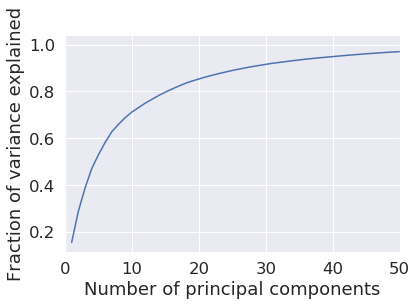

In [12]:
# Do PCA and look at variance explained
pca = PCA()
pca.fit(df.values)
n_features = df.shape[1]
plt.plot(range(1,n_features+1),pca.explained_variance_ratio_.cumsum())
plt.xlim(0,50);
plt.xlabel('Number of principal components')
plt.ylabel('Fraction of variance explained');

In [13]:
# THe transformed values, ordered from highest to lowest variance dimensions
transformed = pca.transform(df.values)

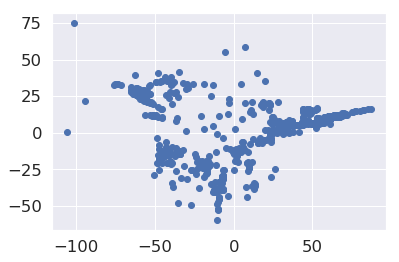

In [14]:
# Do an isomap embedding in 2 dimensions
isomap = Isomap(n_components=2)
isomap.fit(df.values)

# Plot that isomap embedding. Each is a model (or a cell, for data)
plt.scatter(*isomap.embedding_.T);
# I don't love the isomap fit

CPU times: user 2.69 s, sys: 0 ns, total: 2.69 s
Wall time: 2.5 s


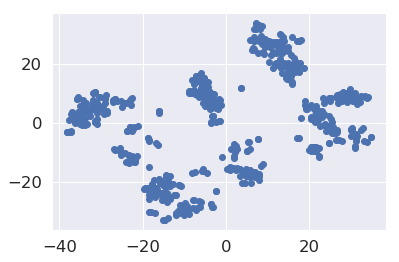

In [15]:
# Do a TSNE embedding in two dimensions
tsne = TSNE(n_components=2, perplexity=25)
%time tsne.fit(df.values)

# Plot that TSNE embedding. Each is a model (or a cell, for data)
plt.scatter(*tsne.embedding_.T);

In [16]:
# PLay around with the value of perplexity. Recommended values are between 5 and 50.  
#See if any of the clusters that pop out mean anything (do they match existing cell type clusters?  
# Do they match known firnig patterns?  
# Where does the data fit in when it is also plotted in this space?)